# **Лабораторная работа №3. Визуализация данных учебной аналитики**

# Описание работы

**Цель:** ознакомиться с различными инструментами и программными пакетами для визуализации данных учебной аналитики, научиться строить Data Storytelling на основании полученных визуализаций.


**Задачи:**
1.  Согласно полученному варианту скачать датасет и изучить его.
2.  Установить необходимое ПО, произвести предварительную настройку, если она требуется.
3.  Подобрать необходимые визуализации к каждому признаку (паре признаков) и реализовать их с помощью **каждого** инструмента. Если признак нельзя визуализировать, то объяснить, почему.
4.  Сравнить полученные графики и диаграммы, выявить достоинства и недостатки каждого инструмента для построения визуализации.
5.  Используя созданные визуализации создать дашборд.
5. На основании созданного дашборда составить **Data Storytelling**.
6.  Сделать выводы по работе.

**Необходимые инструменты и ПО:**

1.   Python + Plotly
2.   Tableau Public
3.   Microsoft Excel / Google Sheets
4. Power BI


Вариант датасета и ссылку на его скачивание можно найти по [ссылке](https://docs.google.com/spreadsheets/d/19X_XHEEl-tkCueVsoMAVX5yx3PO3jYzjAZ4HTkW62Ts/edit?usp=sharing).

## Примечания

1.   Microsoft Excel и Google Sheets не способны обрабатывать данные большого объема. Если ваш датасет, оказался слишком большим, то для работы с этим инструментом его необходимо усечь.
2.   List item




Вариант 14

# Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
from matplotlib import pyplot as plt

In [ ]:
import missingno as mn

In [ ]:
import plotly.express as px
import seaborn as sns

In [ ]:
from re import sub
from decimal import Decimal

In [ ]:
from matplotlib_venn import venn2

In [ ]:
import matplotlib.cm

In [ ]:
from wordcloud import WordCloud

# Подключение google.colab - drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Импорт базы данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/New_stuff/7-s sem/7 - Training analyst/Lab_03/College_data.csv')

In [ ]:
data

,College_Name,State,Stream,UG_fee,PG_fee,Rating,Academic,Accommodation,Faculty,Infrastructure,Placement,Social_Life
0,Indian Institute of Technology Madras,Tamil nadu,Engineering,"75,116","23,070",8.7,9,7.9,8.7,8.8,8.8,9
1,"College of Engineering, Anna University",Tamil nadu,Engineering,"50,000","50,000",8.4,8.7,7.7,8.1,8.7,8.3,8.7
2,"NIT Trichy, Tiruchirappalli",Tamil nadu,Engineering,"1,49,250","99,250",8.5,8.6,7.8,8.2,8.7,8.8,8.7
3,Vellore Institute of Technology,Tamil nadu,Engineering,"1,98,000","1,83,000",8.3,8.3,8,7.8,8.9,8.5,8.5
4,"SRM Engineering College, Kanchipuram",Tamil nadu,Engineering,"2,60,000","1,70,000",7.2,6.5,6.6,6.9,7.6,7.1,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...
6783,Andaman & Nicobar Islands Institute of Medical...,Andaman,Medical,"91,050",--,8.3,8.6,8.4,8.4,8.3,8.2,8.1
6784,"Plastindia International University, Dadra & N...",Dadra,Engineering,--,--,--,--,--,--,--,--,--
6785,SSR Institute of Management and Research,Dadra,Management,"1,30,000",--,8,--,--,8,--,6,--
6786,Institute of Hotel Management and Catering Tec...,Dadra,Hotel-management,"77,000",--,7.7,7,7,8.2,8.5,8,7.4


# Очистка данных

In [ ]:
# data.loc[data["UG_fee"]=="--", "UG_fee"] = 0
# data.loc[data["PG_fee"]=="--", "PG_fee"] = 0
# data.loc[data["Academic"]=="--", "Academic"] = 0
# data.loc[data["Accommodation"]=="--", "Accommodation"] = 0
# data.loc[data["Faculty"]=="--", "Faculty"] = 0
# data.loc[data["Infrastructure"]=="--", "Infrastructure"] = 0
# data.loc[data["Placement"]=="--", "Placement"] = 0
# data.loc[data["Social_Life"]=="--", "Social_Life"] = 0

In [ ]:
for col in data.columns:
    data[col] = np.where(data[col]=='--', np.nan, data[col])

In [ ]:
data.dtypes

College_Name      object
State             object
Stream            object
UG_fee            object
PG_fee            object
Rating            object
Academic          object
Accommodation     object
Faculty           object
Infrastructure    object
Placement         object
Social_Life       object
dtype: object

In [ ]:
# df = df.astype({"Column 1": float, "Column 2": int})

In [ ]:
col_to_cast = data.columns[5:]
data[col_to_cast] = data[col_to_cast].astype(float)

In [ ]:
data.isnull().sum()

College_Name         0
State                0
Stream               0
UG_fee            1170
PG_fee            3311
Rating             732
Academic           846
Accommodation      889
Faculty            907
Infrastructure     916
Placement          890
Social_Life        954
dtype: int64

In [ ]:
data.UG_fee = data.UG_fee.apply(lambda x : float(sub(r'[^\d.]', '', x)) if type(x)==str else np.nan)
data.PG_fee = data.PG_fee.apply(lambda x : float(sub(r'[^\d.]', '', x)) if type(x)==str else np.nan)

In [ ]:
data_test_2 = data

In [ ]:
data_test = data.dropna()

In [ ]:
data_test = data_test.reset_index()

In [ ]:
data_test.drop('index', inplace=True, axis=1)

# Сохранение очищенной версии данных

In [ ]:
data_test

,College_Name,State,Stream,UG_fee,PG_fee,Rating,Academic,Accommodation,Faculty,Infrastructure,Placement,Social_Life
0,Indian Institute of Technology Madras,Tamil nadu,Engineering,75116.0,23070.0,8.7,9.0,7.9,8.7,8.8,8.8,9.0
1,"College of Engineering, Anna University",Tamil nadu,Engineering,50000.0,50000.0,8.4,8.7,7.7,8.1,8.7,8.3,8.7
2,"NIT Trichy, Tiruchirappalli",Tamil nadu,Engineering,149250.0,99250.0,8.5,8.6,7.8,8.2,8.7,8.8,8.7
3,Vellore Institute of Technology,Tamil nadu,Engineering,198000.0,183000.0,8.3,8.3,8.0,7.8,8.9,8.5,8.5
4,"SRM Engineering College, Kanchipuram",Tamil nadu,Engineering,260000.0,170000.0,7.2,6.5,6.6,6.9,7.6,7.1,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...
3190,Mizoram University,Mizoram,Arts,7220.0,16020.0,8.0,8.7,7.0,8.8,8.0,7.6,7.9
3191,Mizoram University,Mizoram,Agriculture,7930.0,12500.0,8.0,8.7,7.0,8.8,8.0,7.6,7.9
3192,Jawaharlal Nehru Rajkeeya Mahavidyalaya,Andaman,Science,939.0,1128.0,6.6,8.5,5.0,7.0,7.5,2.5,9.0
3193,Jawaharlal Nehru Rajkeeya Mahavidyalaya,Andaman,Commerce,843.0,1008.0,6.6,8.5,5.0,7.0,7.5,2.5,9.0


In [ ]:
data_test.to_csv('/content/drive/MyDrive/New_stuff/7-s sem/7 - Training analyst/Lab_03/College_data_cleared.csv')

# Импорт очищенных данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/New_stuff/7-s sem/7 - Training analyst/Lab_03/College_data_cleared.csv', index_col=0)

# Визуализация

In [ ]:
data

,College_Name,State,Stream,UG_fee,PG_fee,Rating,Academic,Accommodation,Faculty,Infrastructure,Placement,Social_Life
0,Indian Institute of Technology Madras,Tamil nadu,Engineering,75116.0,23070.0,8.7,9.0,7.9,8.7,8.8,8.8,9.0
1,"College of Engineering, Anna University",Tamil nadu,Engineering,50000.0,50000.0,8.4,8.7,7.7,8.1,8.7,8.3,8.7
2,"NIT Trichy, Tiruchirappalli",Tamil nadu,Engineering,149250.0,99250.0,8.5,8.6,7.8,8.2,8.7,8.8,8.7
3,Vellore Institute of Technology,Tamil nadu,Engineering,198000.0,183000.0,8.3,8.3,8.0,7.8,8.9,8.5,8.5
4,"SRM Engineering College, Kanchipuram",Tamil nadu,Engineering,260000.0,170000.0,7.2,6.5,6.6,6.9,7.6,7.1,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...
3190,Mizoram University,Mizoram,Arts,7220.0,16020.0,8.0,8.7,7.0,8.8,8.0,7.6,7.9
3191,Mizoram University,Mizoram,Agriculture,7930.0,12500.0,8.0,8.7,7.0,8.8,8.0,7.6,7.9
3192,Jawaharlal Nehru Rajkeeya Mahavidyalaya,Andaman,Science,939.0,1128.0,6.6,8.5,5.0,7.0,7.5,2.5,9.0
3193,Jawaharlal Nehru Rajkeeya Mahavidyalaya,Andaman,Commerce,843.0,1008.0,6.6,8.5,5.0,7.0,7.5,2.5,9.0


## Описание

**College_Name** – названия колледжей;

**state** – название штата, в котором находится колледж;

**stream** – направление обучения;

**UG_fee** – undergraduate tuition fees, cтоимость обучения в бакалавриате;

**PG_fee** – postgraduate tuition fees, стоимость обучения в аспирантуре;

**rating** – рейтинг колледжа, срденяя оценка от других оценок;

**academic** – рейтинг процесса обучения;

**accommodation** – рейтинг общежитий;

**faculty** – рейтинг факультета колледжа;

**infrastructure** – рейтинг инфраструктуры колледжа;

**placement** – рейтинг расположения;

**social_life** – рейтинг социальной жизни.

### Группировка по UG_fee, PG_fee

In [ ]:
group1 = data.groupby(by=['State','Stream']).agg(UG_min_fee=('UG_fee','min'),UG_max_fee=('UG_fee','max'),UG_mean_fee=('UG_fee','mean'))
group2 = data.groupby(by=['State','Stream']).agg(PG_min_fee=('PG_fee','min'),PG_max_fee=('PG_fee','max'),PG_mean_fee=('PG_fee','mean'))

In [ ]:
group1

UG_min_fee  UG_max_fee    UG_mean_fee
State          Stream                                            
Andaman        Arts              843.0       843.0     843.000000
               Commerce          843.0       843.0     843.000000
               Science           939.0       939.0     939.000000
Andhra pradesh Agriculture      6210.0     56928.0   25271.142857
               Arts             5950.0    165000.0   46545.833333
...                                ...         ...            ...
West bengal    Law              1844.0    211000.0   94424.400000
               Management      55000.0   2700000.0  423563.888889
               Medical         12000.0    339600.0   95530.000000
               Pharmacy         2400.0    478000.0  126898.750000
               Science          1371.0    198000.0   69667.000000

[299 rows x 3 columns]

In [ ]:
group2

PG_min_fee  PG_max_fee    PG_mean_fee
State          Stream                                            
Andaman        Arts             1008.0      1008.0    1008.000000
               Commerce         1008.0      1008.0    1008.000000
               Science          1128.0      1128.0    1128.000000
Andhra pradesh Agriculture     10920.0     68988.0   35652.571429
               Arts             5000.0    160000.0   57531.666667
...                                ...         ...            ...
West bengal    Law              3944.0    243600.0  101494.400000
               Management      10000.0    650000.0  186244.444444
               Medical         15250.0    184800.0   61025.000000
               Pharmacy         2500.0    305700.0  140568.750000
               Science          1604.0    177510.0   68216.470588

[299 rows x 3 columns]

## Пропущенные значения

In [ ]:
data_test_2

,College_Name,State,Stream,UG_fee,PG_fee,Rating,Academic,Accommodation,Faculty,Infrastructure,Placement,Social_Life
0,Indian Institute of Technology Madras,Tamil nadu,Engineering,75116.0,23070.0,8.7,9.0,7.9,8.7,8.8,8.8,9.0
1,"College of Engineering, Anna University",Tamil nadu,Engineering,50000.0,50000.0,8.4,8.7,7.7,8.1,8.7,8.3,8.7
2,"NIT Trichy, Tiruchirappalli",Tamil nadu,Engineering,149250.0,99250.0,8.5,8.6,7.8,8.2,8.7,8.8,8.7
3,Vellore Institute of Technology,Tamil nadu,Engineering,198000.0,183000.0,8.3,8.3,8.0,7.8,8.9,8.5,8.5
4,"SRM Engineering College, Kanchipuram",Tamil nadu,Engineering,260000.0,170000.0,7.2,6.5,6.6,6.9,7.6,7.1,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...
6783,Andaman & Nicobar Islands Institute of Medical...,Andaman,Medical,91050.0,NaN,8.3,8.6,8.4,8.4,8.3,8.2,8.1
6784,"Plastindia International University, Dadra & N...",Dadra,Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6785,SSR Institute of Management and Research,Dadra,Management,130000.0,NaN,8.0,NaN,NaN,8.0,NaN,6.0,NaN
6786,Institute of Hotel Management and Catering Tec...,Dadra,Hotel-management,77000.0,NaN,7.7,7.0,7.0,8.2,8.5,8.0,7.4


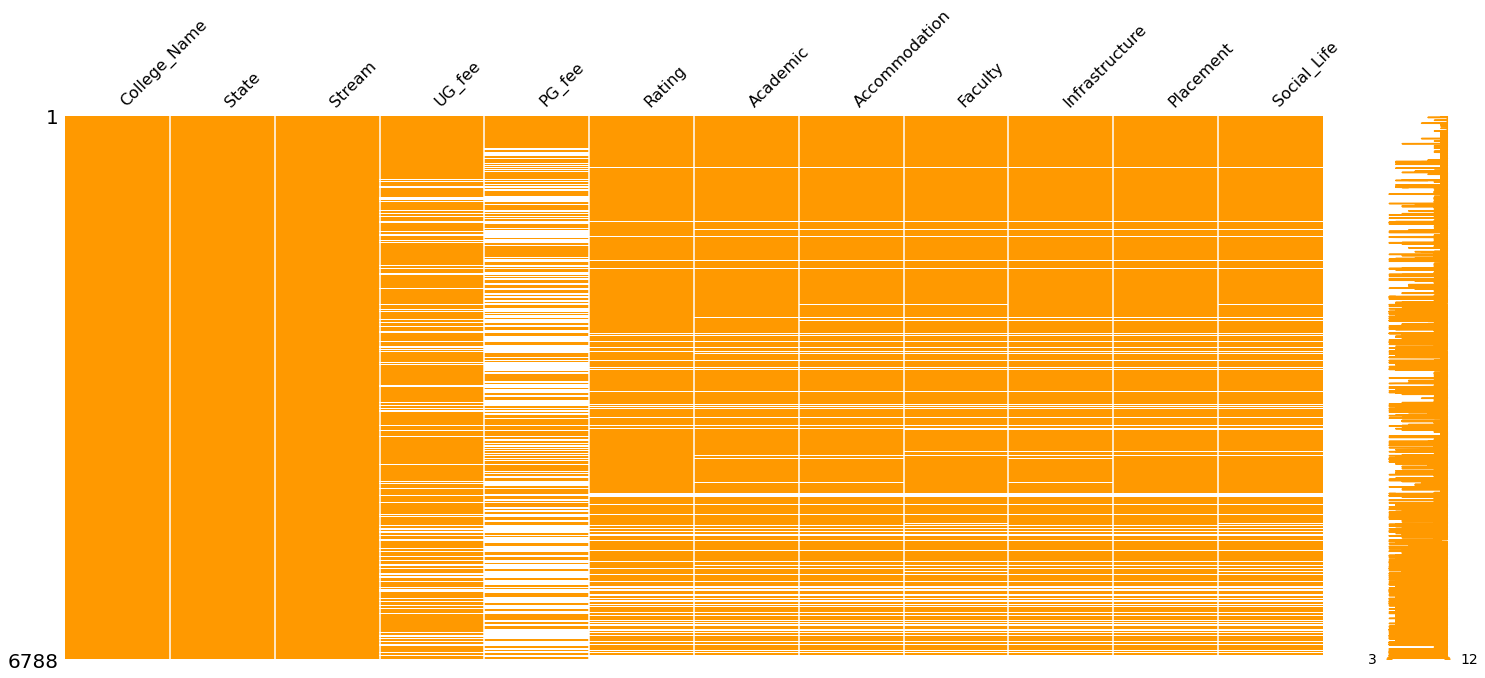

In [ ]:
#Визуализация пропущенных значений
mn.matrix(data_test_2, color=(1,0.60,0));

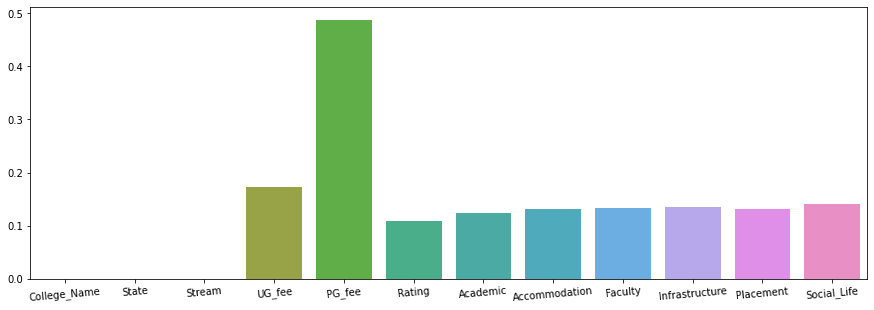

In [ ]:
# Визуализация процента пропущенных значений
plt.figure(figsize=(15,5))
sns.barplot(x=data_test_2.columns, y=data_test_2.isnull().sum()/len(data_test_2))
plt.xticks(rotation=5)
plt.show()

## Количество колледжей у каждого штата

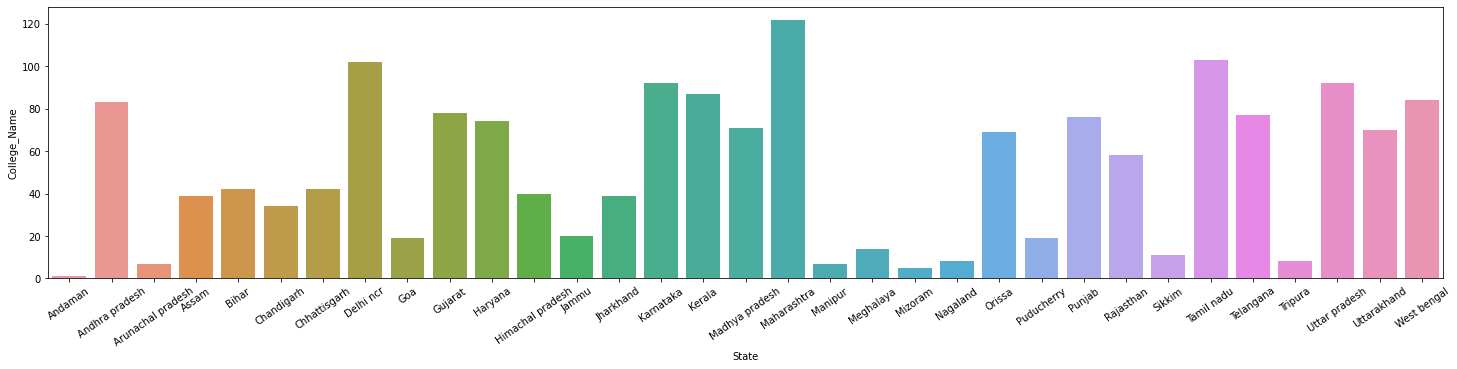

In [ ]:
data_plot = data.groupby(by=['State']).College_Name.nunique()
plt.figure(figsize=(25,5))
plt.xticks(rotation=35)
sns.barplot(x=data_plot.index,y=data_plot)

## Ящик с усами

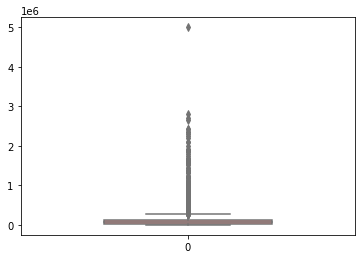

In [ ]:
sns.boxplot(data=data['UG_fee'], palette='spring', width=0.5);

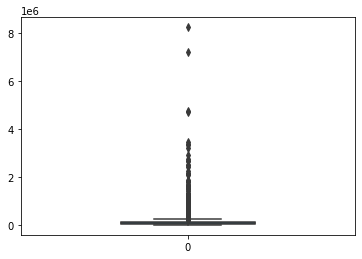

In [ ]:
sns.boxplot(data=data['PG_fee'], palette='winter', width=0.4);

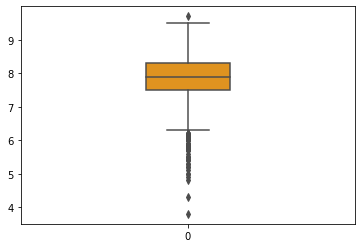

In [ ]:
sns.boxplot(data=data['Rating'], color=(1,0.60,0), width=0.25)

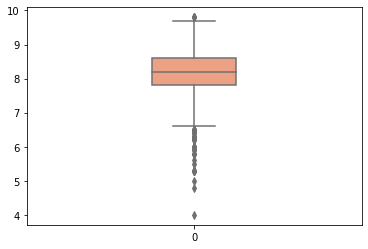

In [ ]:
sns.boxplot(data=data['Academic'], color=(1,0.60,0.45), width=0.25)

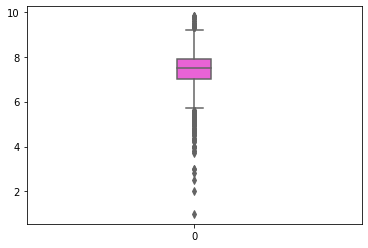

In [ ]:
sns.boxplot(data=data['Accommodation'], color=(1,0.30,0.9), width=0.1)

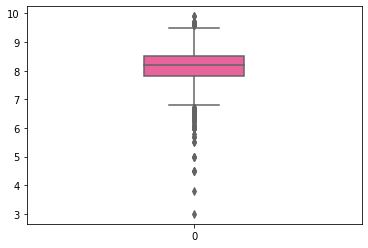

In [ ]:
sns.boxplot(data=data['Faculty'], color=(1,0.30,0.6), width=0.3)

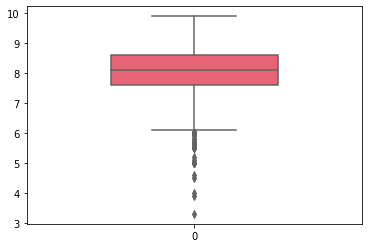

In [ ]:
sns.boxplot(data=data['Infrastructure'], color=(1,0.30,0.4), width=0.5)

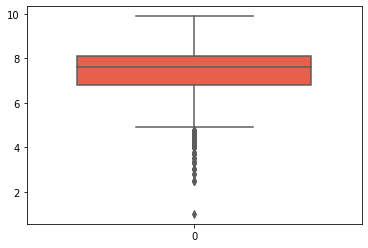

In [ ]:
sns.boxplot(data=data['Placement'], color=(1,0.30,0.2), width=0.7)

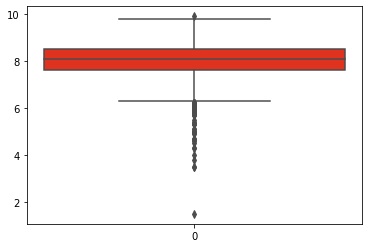

In [ ]:
sns.boxplot(data=data['Social_Life'], color=(1,0.10,0), width=0.9)

# Информативная визуализация

## Диаграмма рассеяния

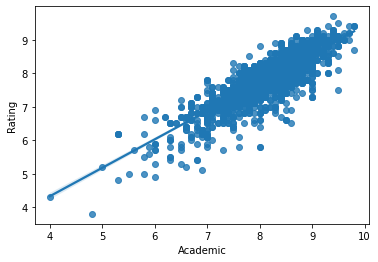

In [ ]:
# College_Name	State	Stream
# UG_fee	PG_fee
# Rating	Academic	Accommodation	Faculty	Infrastructure	Placement	Social_Life
sns.regplot(x=data['Academic'], y=data['Rating']);

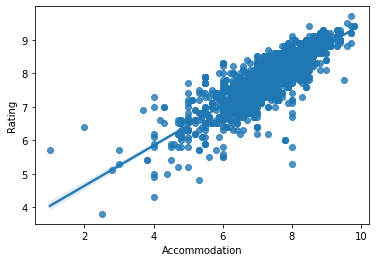

In [ ]:
sns.regplot(x=data['Accommodation'], y=data['Rating']);

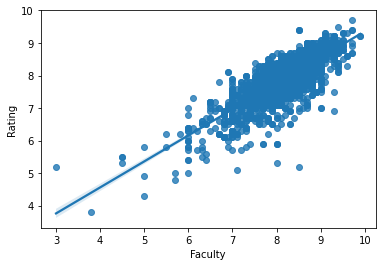

In [ ]:
sns.regplot(x=data['Faculty'], y=data['Rating']);

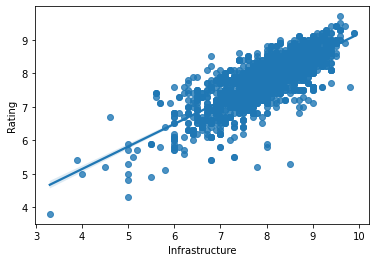

In [ ]:
sns.regplot(x=data['Infrastructure'], y=data['Rating']);

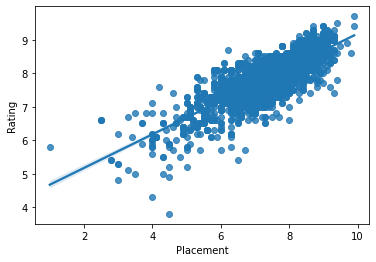

In [ ]:
sns.regplot(x=data['Placement'], y=data['Rating']);

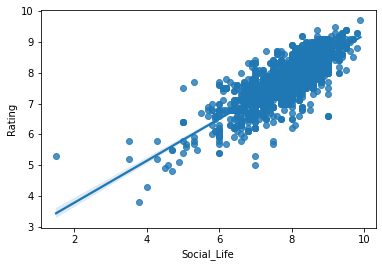

In [ ]:
sns.regplot(x=data['Social_Life'], y=data['Rating']);

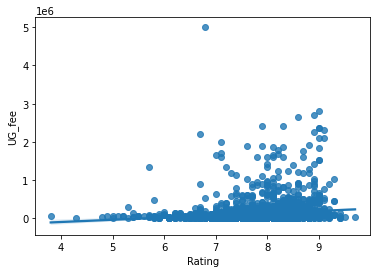

In [ ]:
sns.regplot(x=data['Rating'], y=data['UG_fee']);

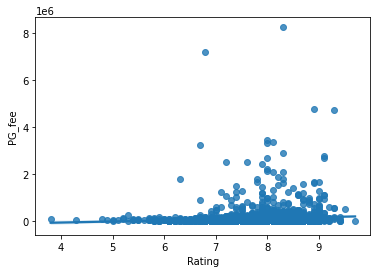

In [ ]:
sns.regplot(x=data['Rating'], y=data['PG_fee']);

## Линейная диаграмма

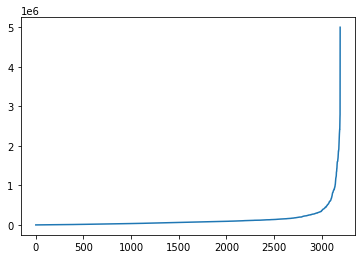

In [ ]:
# College_Name	State	Stream
# UG_fee	PG_fee
# Rating	Academic	Accommodation	Faculty	Infrastructure	Placement	Social_Life
plt.plot(sorted(data['UG_fee']));

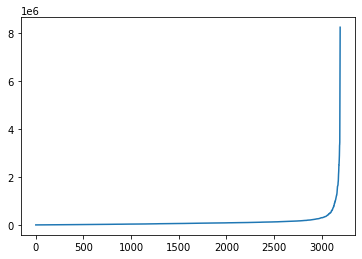

In [ ]:
plt.plot(sorted(data['PG_fee']));

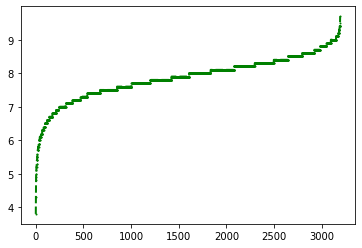

In [ ]:
plt.plot(sorted(data['Rating']), 'go--', linewidth=2, markersize=1);

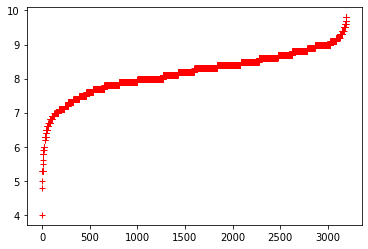

In [ ]:
plt.plot(sorted(data['Academic']), 'r+');

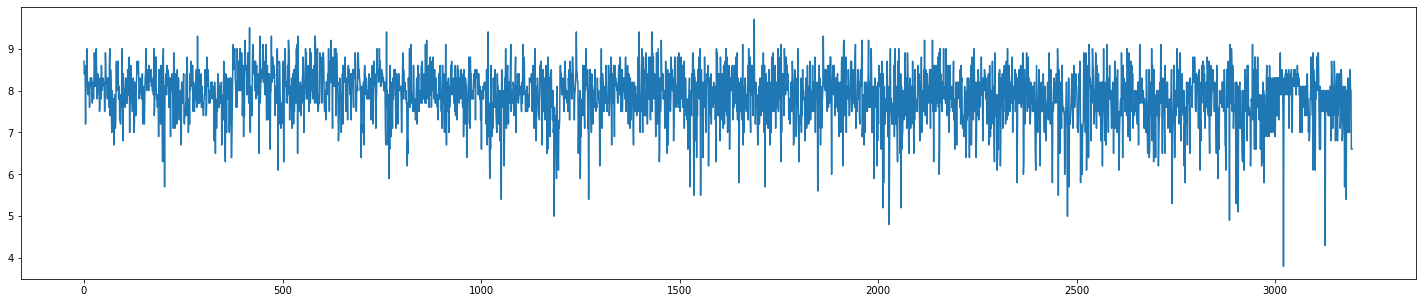

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(data.Rating);

## Столбчатая (столбиковая) диаграмма, гистограмма

<BarContainer object of 12 artists>

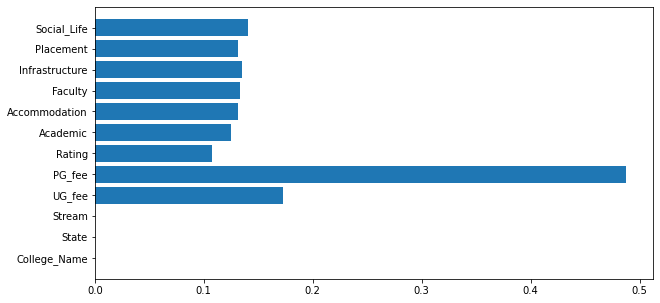

In [ ]:
labels = [] 
for i in data_test_2.columns:(labels.append(i))
scores = []
for i in data_test_2.isnull().sum()/len(data_test_2):(scores.append(i))

plt.figure(figsize=(10,5))
plt.barh(labels, scores)

(array([   2.,    2.,   13.,   36.,  121.,  366., 1069., 1187.,  376.,
          23.]),
 array([3.8 , 4.39, 4.98, 5.57, 6.16, 6.75, 7.34, 7.93, 8.52, 9.11, 9.7 ]),
 <a list of 10 Patch objects>)

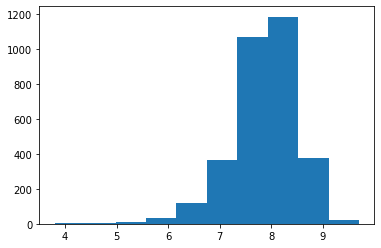

In [ ]:
plt.hist(data['Rating'])

## Круговая диаграмма (pie chart)

In [ ]:
fig = px.pie(data, names = "Rating",title = "<b>Ratings</b>",)

fig.update_traces(textposition='inside',textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))
fig.show()

## Кольцевая диаграмма (donut chart)

In [ ]:
# donut chart
fig = px.pie(round(data), names = "Social_Life",title = "<b>Social life rating</b>", hole = 0.5, )

fig.update_traces(textposition='outside',textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 0.5)))
fig.show()

## Диаграмма Венна

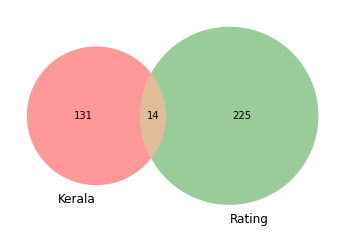

In [ ]:
# Use the venn2 function
venn2(subsets = (len(data.loc[data.State == 'Kerala']), 
                 len(data.loc[data.Rating == 8]), 
                 len(data.loc[(data.Rating == 8)&(data.State == 'Kerala')])), 
      set_labels = ('Kerala', 'Rating'))
plt.show()

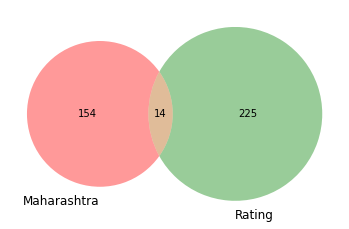

In [ ]:
venn2(subsets = (len(data.loc[data.State == 'Maharashtra']), 
                 len(data.loc[data.Rating == 8]), 
                 len(data.loc[(data.Rating == 8)&(data.State == 'Maharashtra')])), 
      set_labels = ('Maharashtra', 'Rating'))
plt.show()

## Облако слов

In [ ]:
print(matplotlib.cm.cmap_d.keys())

dict_keys(['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 

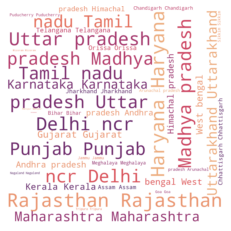

In [ ]:
# Create a list of word
text = ''
text = ' '.join(data['State'].tolist())

# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0, background_color="white", colormap="flare").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

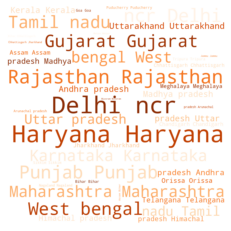

In [ ]:
# Create a list of word
text = ''
text = ' '.join(data.loc[round(data.Rating) == 8]['State'].tolist())

# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0, background_color="white", colormap="Oranges").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Двойной анализ по категориальным и численным признакам

## Парные столбчатые диаграммы

In [ ]:
fig = px.histogram(data, x="Rating", color = "Academic",
                   template = 'plotly_white', barmode = 'group', color_discrete_sequence = ['orange', 'red'])

fig.update_layout(bargap=0.2)

fig.show()

## Пузырьковая диаграмма

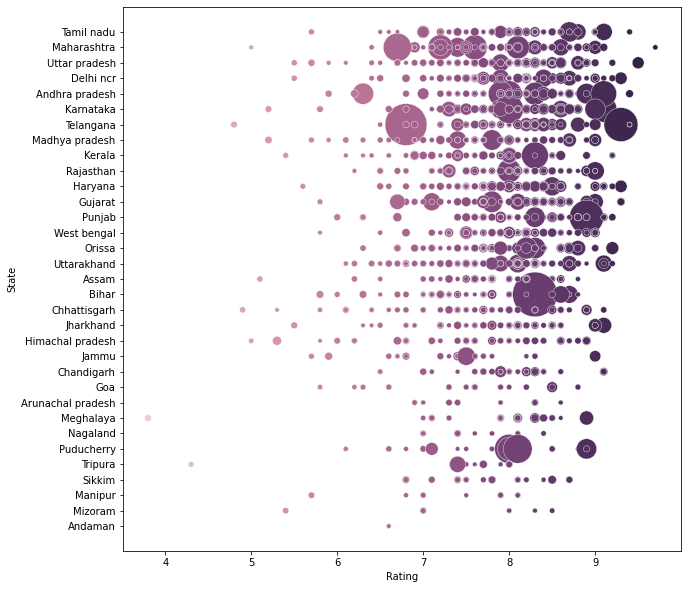

In [ ]:
# data
# data_test_2 = data.loc[data.State == 'Nagaland']

# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="Rating", y="State", size="PG_fee", legend=False, sizes=(20, 2000), hue='Rating')

# show the graph
plt.show()

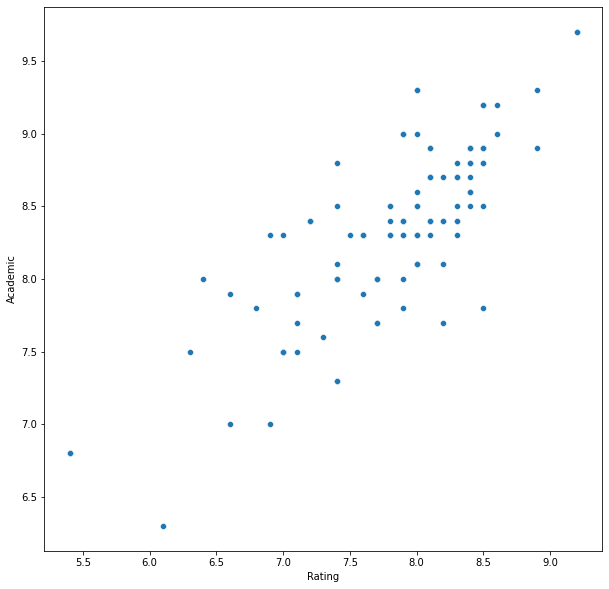

In [ ]:
# Control figure size for this notebook:
plt.rcParams['figure.figsize'] = [10, 10]

# data
data_rating = data.loc[data.State == 'Kerala']

# use the scatterplot function to build the bubble map
sns.scatterplot(data=data_rating, x="Rating", y="Academic", legend=True, sizes=(20, 2000))

# show the graph
plt.show()

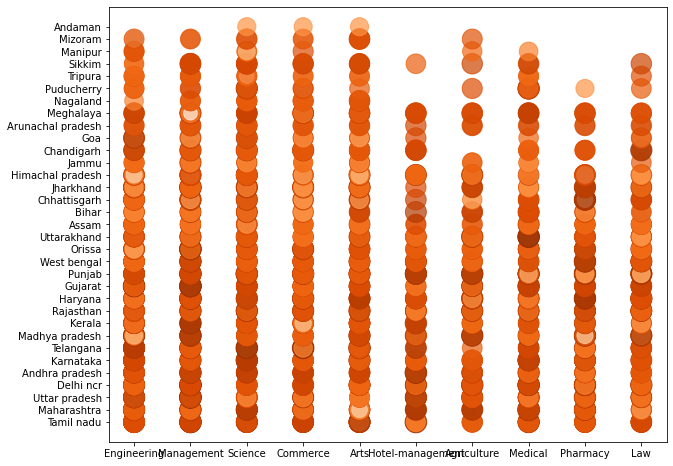

In [ ]:
s_scaling = 50
fig = plt.figure(figsize= (10,8))
ax = fig.add_subplot(111)
ax.scatter(x="Stream", y="State", s=data.Rating*s_scaling,  # scaling the size here
           data=data, alpha=0.7, c=data.Rating*500, cmap='Oranges')

## Парный график

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



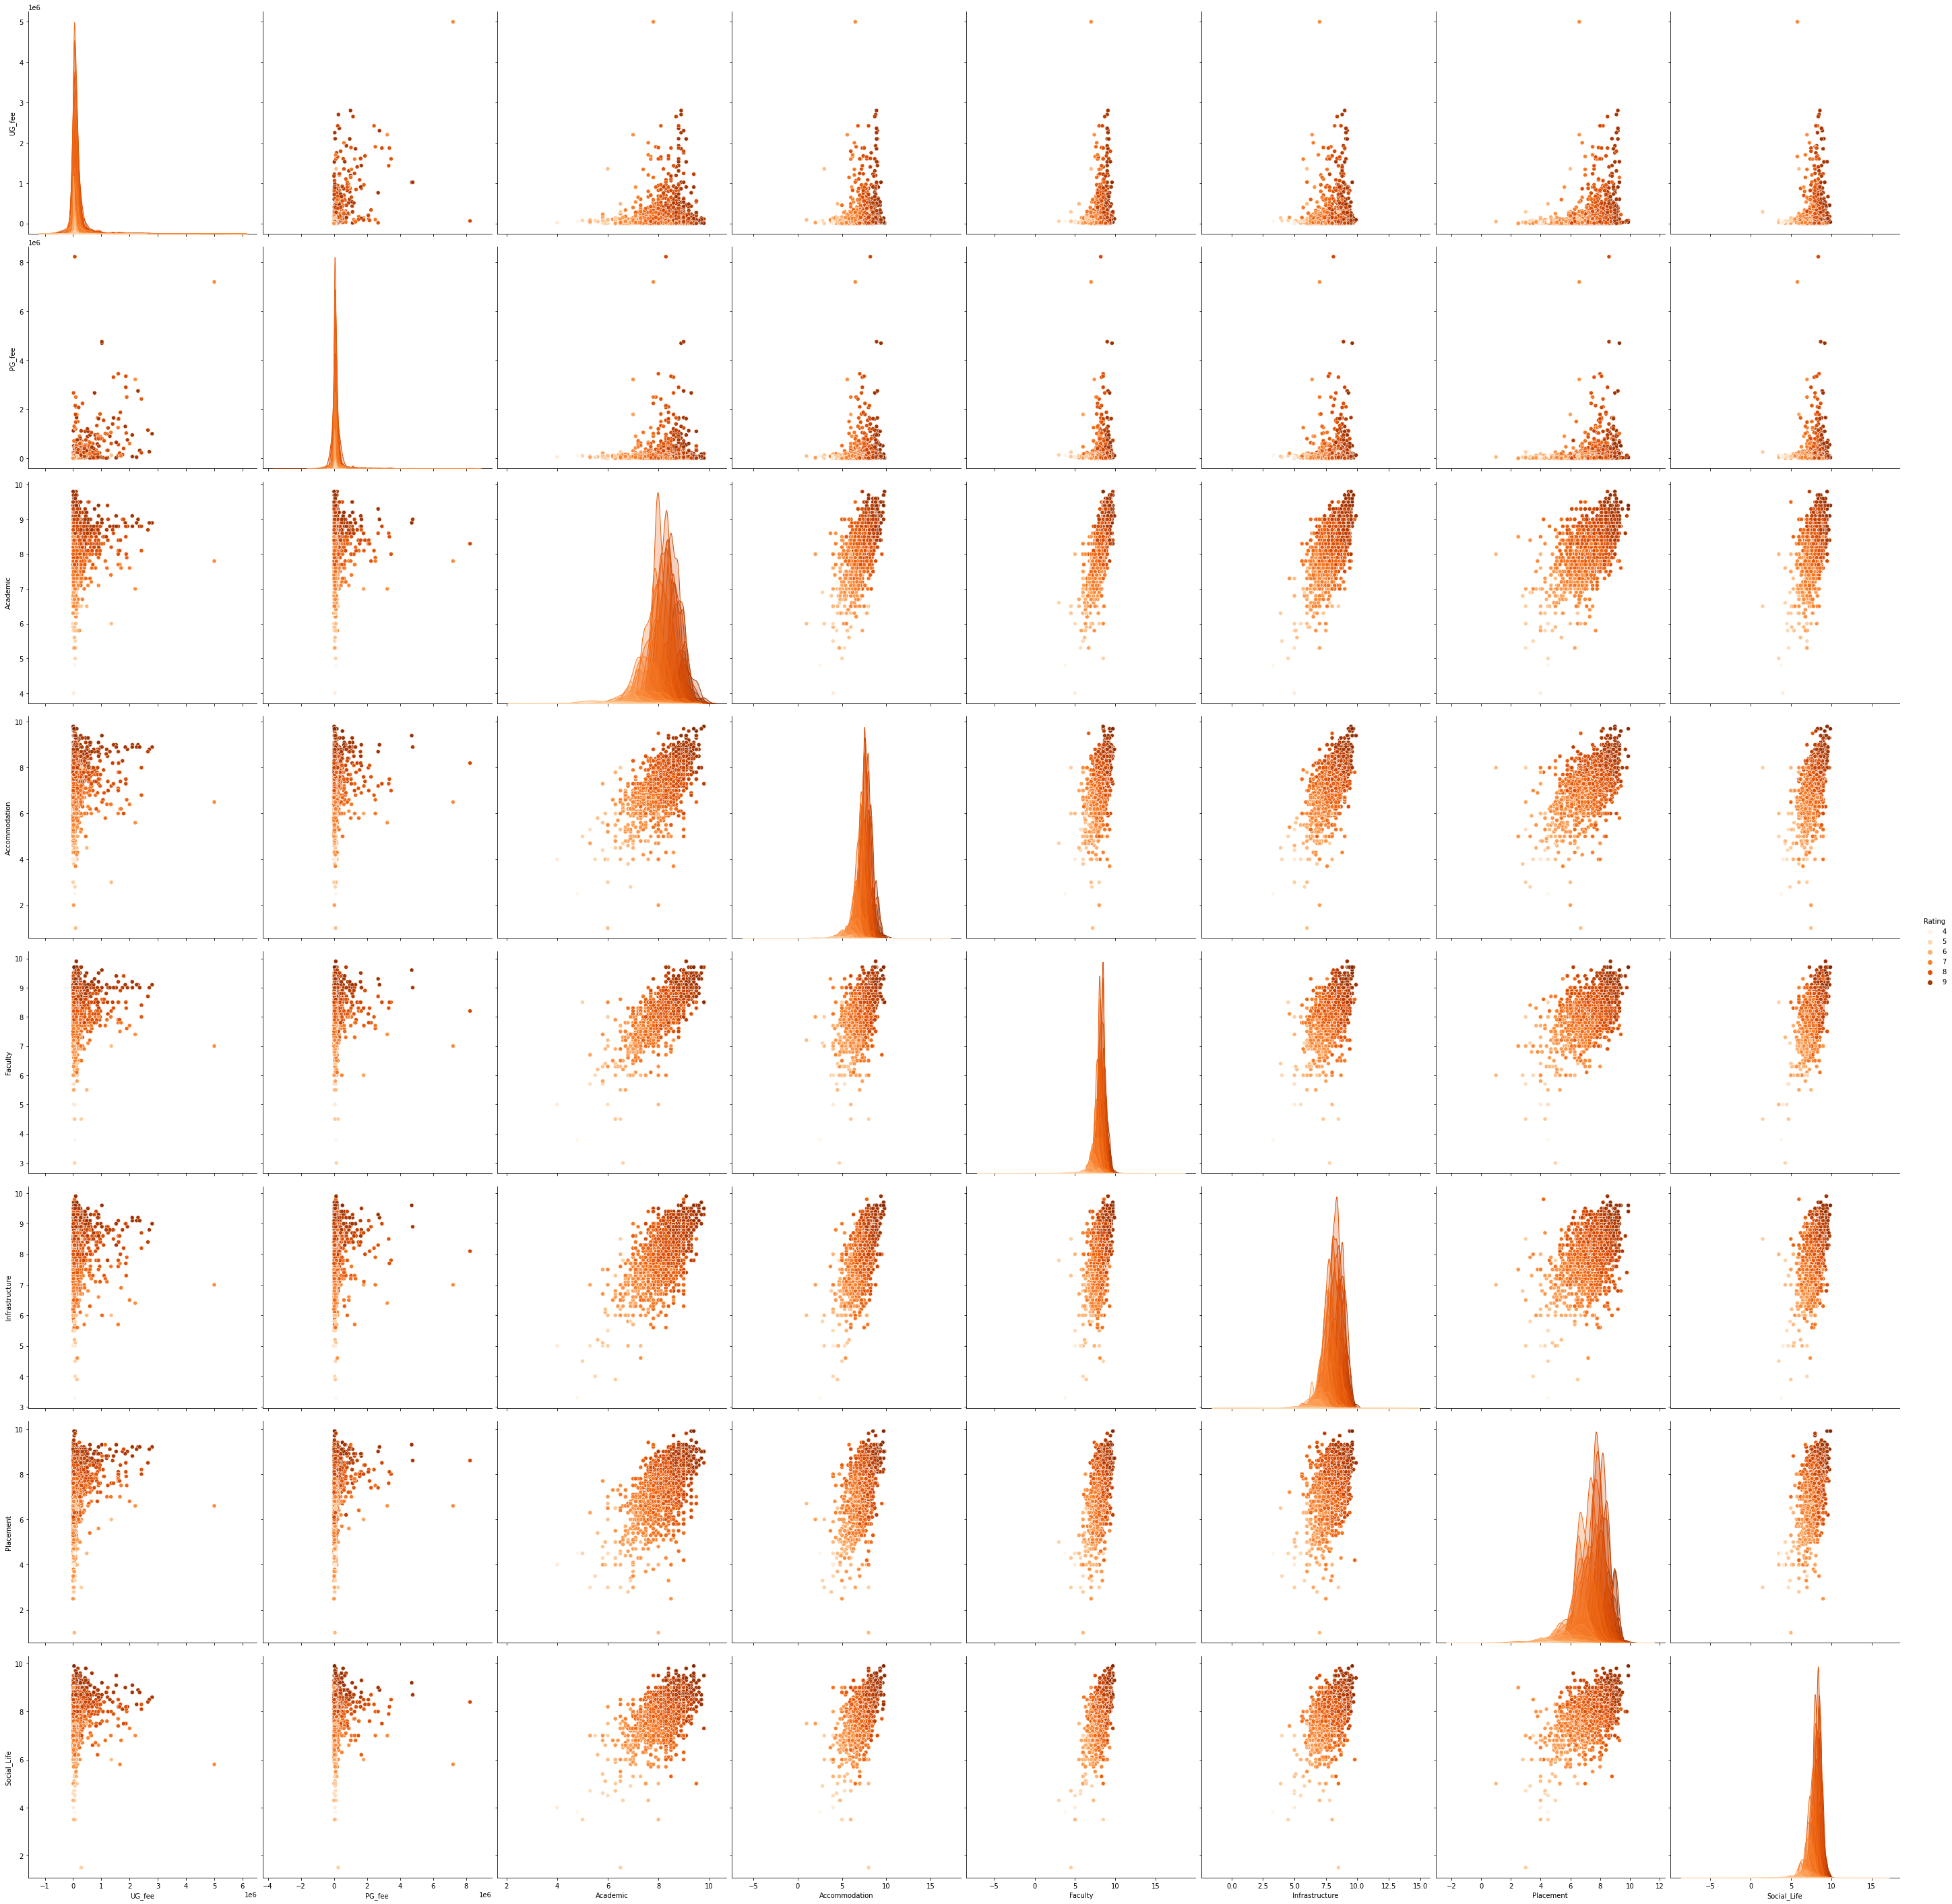

In [ ]:
sns.pairplot(data,hue = 'Rating',size = 5, palette='Oranges')
plt.show()

# Проверка корреляции

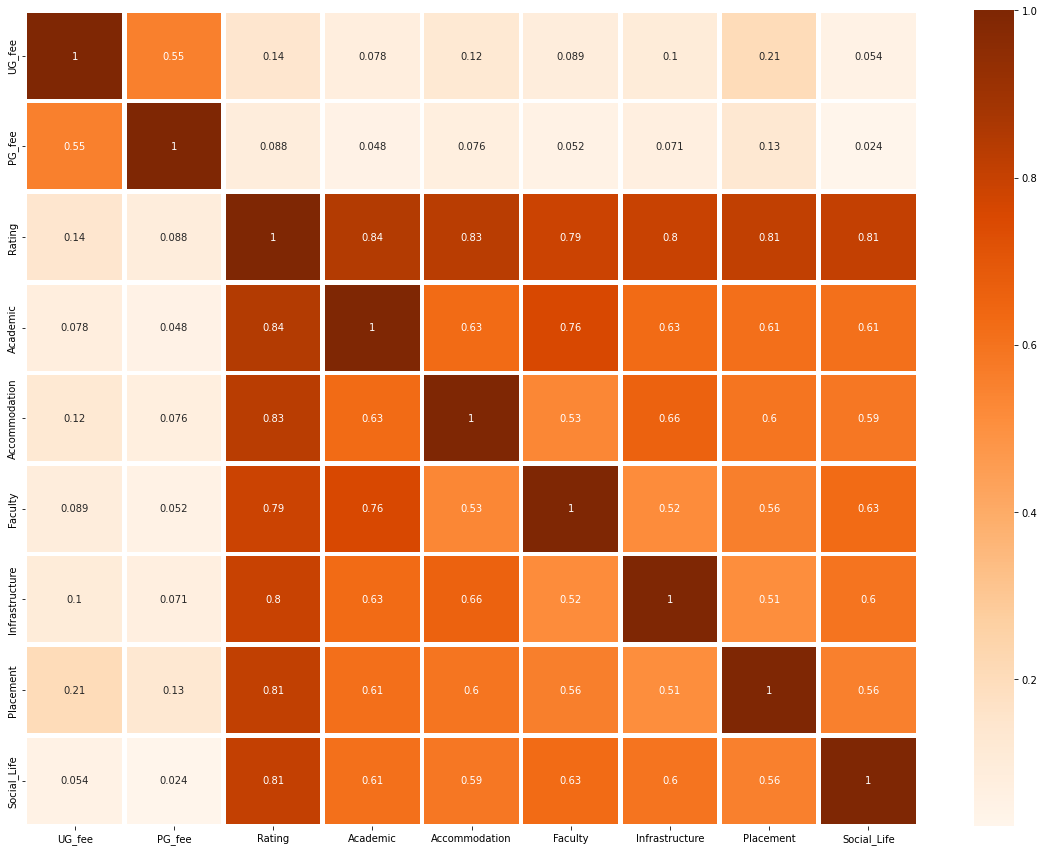

In [ ]:
corrmat = data.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,15))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="Oranges",linewidths=3.5,
    linecolor='white')